<a href="https://colab.research.google.com/github/ShravaniKharade2110/CODSOFT/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import numpy as np
import pandas as pd
import os
import re

In [14]:
train=pd.read_csv("/content/sample_data/creditcard.csv")
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,6634,-1.611463,0.190648,0.901715,1.531254,-1.535865,0.799245,1.513786,0.495829,0.200390,...,0.211223,0.007477,1.026272,0.057628,-0.024955,-0.368263,0.081684,0.140669,458.92,0.0
5970,6635,-1.420272,1.449354,1.320110,-1.894320,0.913695,0.454601,0.894179,-0.385450,2.433841,...,-0.529027,-0.368394,-0.247773,-1.189156,-0.126040,0.701487,0.277333,-0.222694,0.77,0.0
5971,6637,-1.206696,0.284728,2.152053,-2.850437,-0.437285,-0.238376,-0.333341,0.334679,2.870542,...,0.039460,0.464476,-0.457193,-0.556105,0.517579,0.008006,0.366054,0.185008,14.00,0.0
5972,6644,1.067611,0.091006,-0.153917,0.704233,0.113894,-0.826866,0.567690,-0.464181,0.957295,...,-0.476723,-1.410090,-0.037550,-0.177773,0.321810,0.114930,-0.109640,0.023205,139.90,0.0


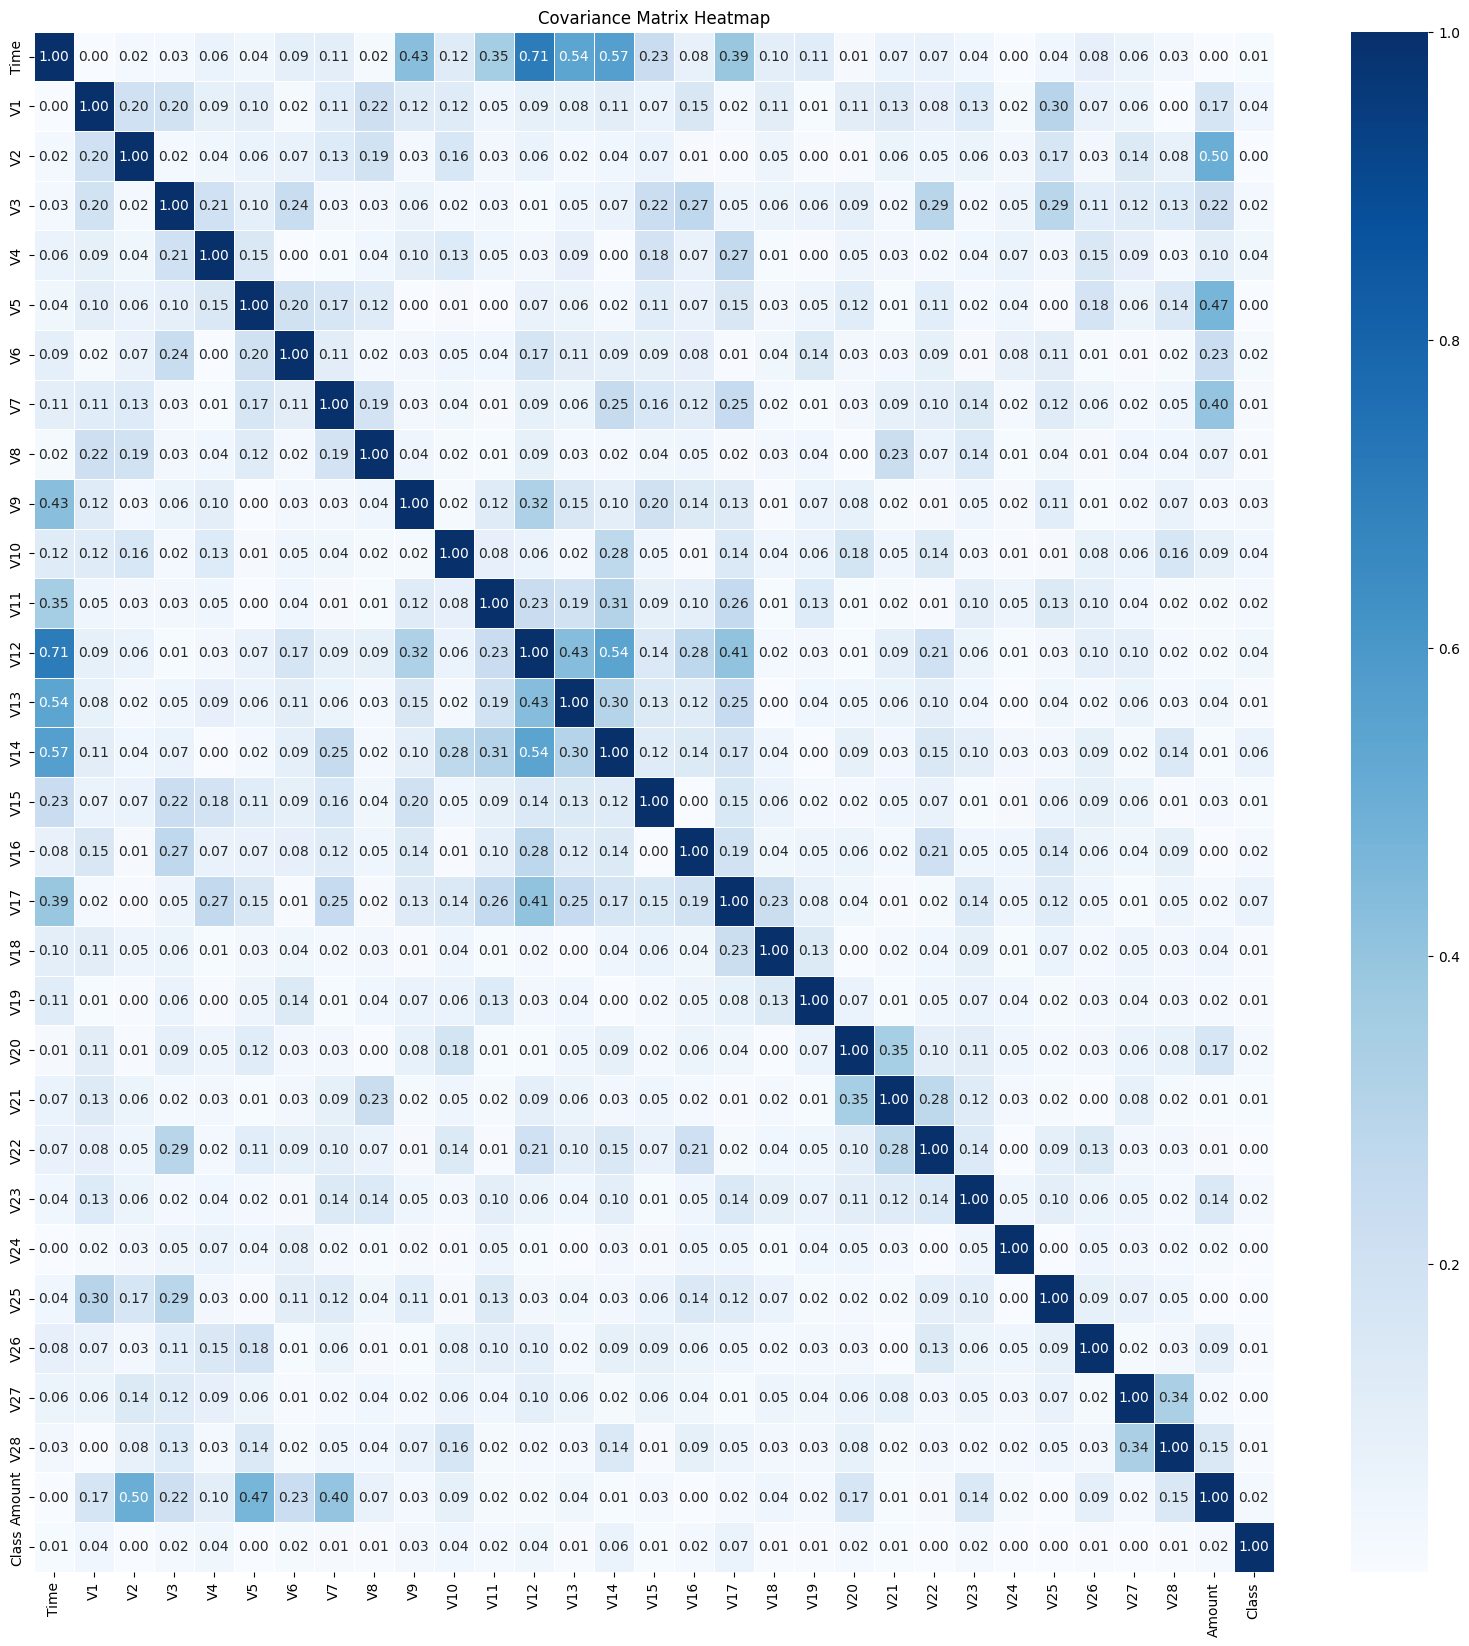

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
scaler= StandardScaler()
df = train.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
trainup = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
cov_matrix = abs(trainup.cov())
plt.figure(figsize=(20, 20))
sns.heatmap(cov_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [16]:
df=df.drop(['Time', 'V13', 'V15', 'V22', 'V23', 'V24','V25','V26','V28', 'Amount' ], axis=1)
X_train=df.drop(['Class'], axis=1)
Y_train=df['Class']
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [17]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = xgb.XGBClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train, Y_train, cv=kf, scoring='accuracy')
accuracy_values = cv_results
average_accuracy = cv_results.mean()
print("Accuracy for each fold:", accuracy_values)
print("Average Accuracy across all folds:", average_accuracy)

Accuracy for each fold: [nan nan nan nan nan]
Average Accuracy across all folds: nan


/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, 

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [19]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
